In [ ]:
# Libraries
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Synthetic Dataset: https://www.kaggle.com/competitions/playground-series-s4e1/data
synthetic_train_data = pd.read_csv('/content/train.csv')
synthetic_test_data = pd.read_csv('/content/test.csv')

synthetic_test_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [ ]:
# Generate summary statistics
summary_statistics_train = synthetic_train_data.describe()
summary_statistics_train

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
# Label encoding for text data:
encoder = LabelEncoder()
categorical_features_train = synthetic_train_data.select_dtypes(include = 'object').columns
print("Train Categorical Features: ", categorical_features_train)

categorical_features_test = synthetic_test_data.select_dtypes(include = 'object').columns
print("Test Categorical Features: ", categorical_features_test)

for feature in categorical_features_train:
    synthetic_train_data[feature] = encoder.fit_transform(synthetic_train_data[feature])

for feature in categorical_features_test:
    synthetic_test_data[feature] = encoder.fit_transform(synthetic_test_data[feature])

# MinMax Scaler for credit score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
synthetic_train_data['CreditScore'] = scaler.fit_transform(synthetic_train_data[['CreditScore']])
synthetic_test_data['CreditScore'] = scaler.fit_transform(synthetic_test_data[['CreditScore']])

# Robust Scaler for Balance
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
synthetic_train_data['Balance'] = scaler.fit_transform(synthetic_train_data[['Balance']])
synthetic_test_data['Balance'] = scaler.fit_transform(synthetic_test_data[['Balance']])

# MinMax Scaler for Estimated Salary
scaler = MinMaxScaler()
synthetic_train_data['EstimatedSalary'] = scaler.fit_transform(synthetic_train_data[['EstimatedSalary']])
synthetic_test_data['EstimatedSalary'] = scaler.fit_transform(synthetic_test_data[['EstimatedSalary']])

# Age / 100
synthetic_train_data['Age'] = synthetic_train_data['Age'] / 100
synthetic_test_data['Age'] = synthetic_test_data['Age'] / 100

#synthetic_train_data.columns

synthetic_train_data.drop('Surname', axis=1, inplace=True)
synthetic_train_data.drop("CustomerId", axis=1, inplace=True)
synthetic_train_data.dropna(inplace=True)

# Test Data
synthetic_test_data.drop('Surname', axis=1, inplace=True)
synthetic_test_data.drop("CustomerId", axis=1, inplace=True)

X_train = synthetic_train_data.drop('Exited', axis=1)
y_train = synthetic_train_data['Exited']
X_test = synthetic_test_data

Train Categorical Features:  Index(['Surname', 'Geography', 'Gender'], dtype='object')
Test Categorical Features:  Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [ ]:
X_train.describe()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,165034.0000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,0.612909,0.648545,0.564429,0.381259,5.020353,0.462551,1.554455,0.753954,0.497770,0.562870
std,47641.3565,0.160207,0.816574,0.495833,0.088672,2.806159,0.523745,0.547154,0.430707,0.499997,0.251488
min,0.0000,0.000000,0.000000,0.000000,0.180000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,41258.2500,0.494000,0.000000,0.000000,0.320000,3.000000,0.000000,1.000000,1.000000,0.000000,0.373166
50%,82516.5000,0.618000,0.000000,1.000000,0.370000,5.000000,0.000000,2.000000,1.000000,0.000000,0.589738
75%,123774.7500,0.720000,1.000000,1.000000,0.420000,7.000000,1.000000,2.000000,1.000000,1.000000,0.775779
max,165033.0000,1.000000,2.000000,1.000000,0.920000,10.000000,2.091872,4.000000,1.000000,1.000000,1.000000


In [ ]:
# Train Decision Tree Classifer on Actual Test Data
clf = DecisionTreeClassifier(criterion='log_loss')
clf = clf.fit(X_train,y_train)

# Predict test set with the trained classifier
y_pred_test = clf.predict(X_test)

Accuracy: 0.7993779160186625
Precision: 0.523212280044927
Recall: 0.5360053696423435


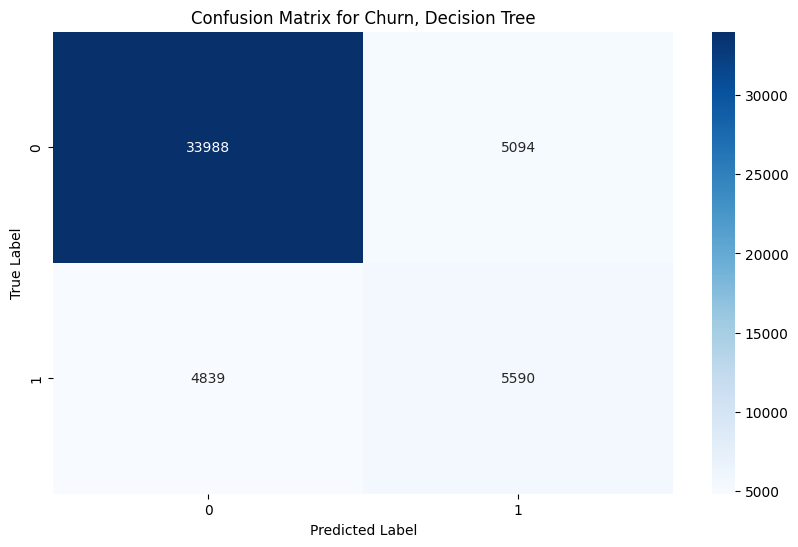

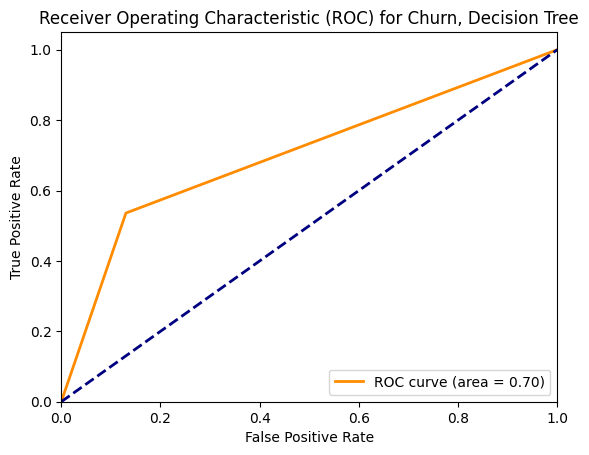

In [ ]:
# Check Decision Tree Accuracy by Splitting Training Data
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train,y_train, train_size=0.7, random_state = 14)

# Train Decision Tree
clf2=clf.fit(X_train_train, y_train_train)
Y_pred_train = clf.predict(X_train_test)

# Accuracy
print("Accuracy:",metrics.accuracy_score(y_train_test, Y_pred_train))
print("Precision:",metrics.precision_score(y_train_test, Y_pred_train))
print("Recall:",metrics.recall_score(y_train_test, Y_pred_train))

# Confusion Matrix
cm_pred_train = confusion_matrix(y_train_test, Y_pred_train)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm_pred_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Churn, Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC AUC Curve
y_scores = clf.predict_proba(X_train_test)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train_test, y_scores)
roc_auc = auc(fpr, tpr)

# PLot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Churn, Decision Tree')
plt.legend(loc="lower right")
plt.show()